In [106]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Template matching in frequency domain

In [107]:
!wget -nc https://www.dais.unive.it/~bergamasco/teachingfiles/cvstuff/murales1.png
!wget -nc https://www.dais.unive.it/~bergamasco/teachingfiles/cvstuff/murales2.png

--2023-07-05 16:44:40--  https://www.dais.unive.it/~bergamasco/teachingfiles/cvstuff/murales1.png
Resolving www.dais.unive.it (www.dais.unive.it)... 157.138.20.11
Connecting to www.dais.unive.it (www.dais.unive.it)|157.138.20.11|:443... connected.
HTTP request sent, awaiting response... 

200 OK
Length: 678934 (663K) [image/png]
Saving to: ‘murales1.png’

murales1.png        100%[===================>] 663,02K  3,30MB/s    in 0,2s    

2023-07-05 16:44:40 (3,30 MB/s) - ‘murales1.png’ saved [678934/678934]

--2023-07-05 16:44:40--  https://www.dais.unive.it/~bergamasco/teachingfiles/cvstuff/murales2.png
Resolving www.dais.unive.it (www.dais.unive.it)... 157.138.20.11
Connecting to www.dais.unive.it (www.dais.unive.it)|157.138.20.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 628908 (614K) [image/png]
Saving to: ‘murales2.png’

murales2.png        100%[===================>] 614,17K  3,27MB/s    in 0,2s    

2023-07-05 16:44:40 (3,27 MB/s) - ‘murales2.png’ saved [628908/628908]



In [108]:
Mur1 = cv.imread("murales1.png", cv.IMREAD_GRAYSCALE).astype( np.float32 )
Mur2 = cv.imread("murales2.png", cv.IMREAD_GRAYSCALE).astype( np.float32 )

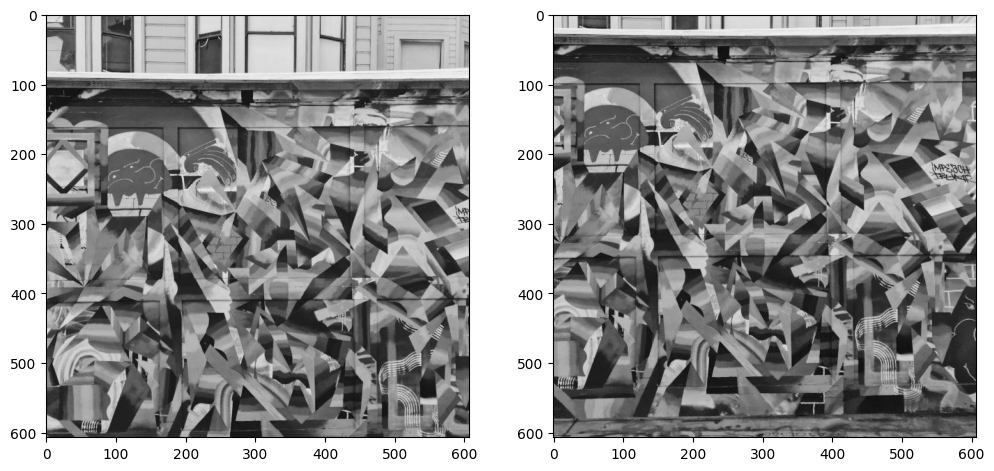

In [109]:
plt.figure( figsize=(12,12))
plt.subplot(1,2,1)
plt.imshow(Mur1, cmap="gray")
plt.subplot(1,2,2)
plt.imshow(Mur2, cmap="gray")

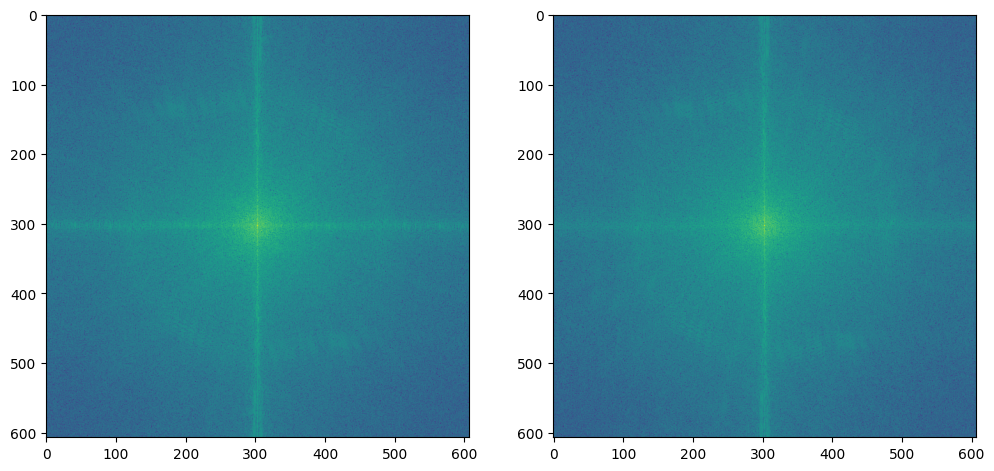

In [110]:
# Convert to frequency domain
# The zero-frequency component to the center of the spectrum using hte 2D - Disccrete Fourier Transform
Mur1f = np.fft.fftshift( np.fft.fft2( Mur1 ) )
Mur2f = np.fft.fftshift( np.fft.fft2( Mur2 ) )

plt.figure( figsize=(12,12))
plt.subplot(1,2,1)
plt.imshow( np.log( np.abs(Mur1f)+1 ) )
plt.subplot(1,2,2)
plt.imshow( np.log( np.abs(Mur2f)+1 ) )


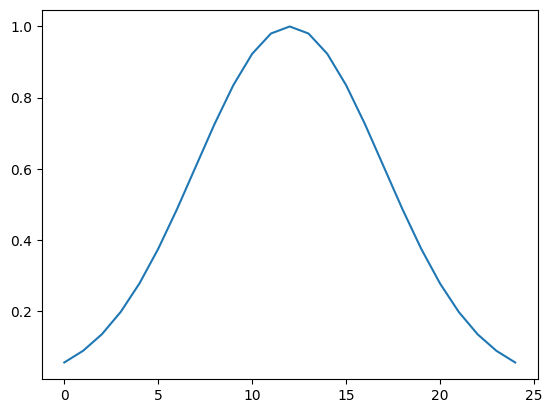

In [111]:
# Convolve test

from scipy import signal

# Generate a gaussian distribution of 25 points with SD = 5.0
w = np.expand_dims( signal.windows.gaussian( 25, 5.0 ), axis=-1)
plt.plot(w)

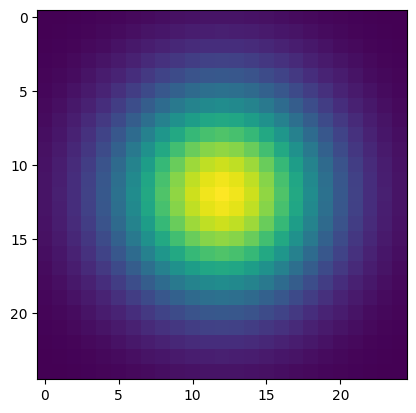

In [112]:
W = w @ w.T
plt.imshow(W)

(25, 25) (607, 607) (607, 607)


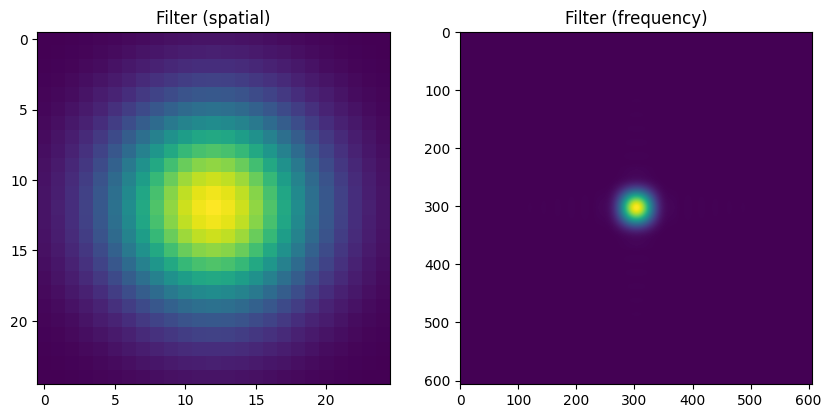

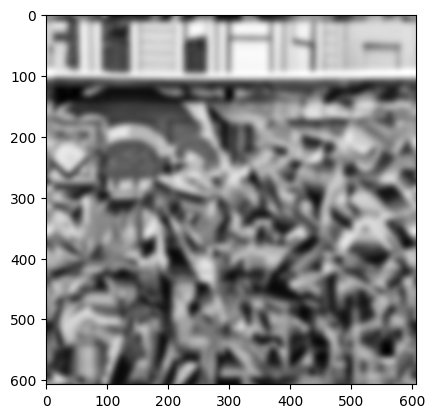

In [113]:
Wf = np.fft.fftshift( np.fft.fft2( W, Mur1f.shape ) ) # 2D - Discrete Fourier transform


plt.figure( figsize=(10,10) )
plt.subplot(1,2,1)
plt.imshow(W, interpolation=None)
plt.title("Filter (spatial)")
plt.subplot(1,2,2)
plt.imshow( np.abs(Wf), interpolation=None)
plt.title("Filter (frequency)")

print(W.shape, Mur1f.shape, Wf.shape)

Mur1_filtered = np.real( np.fft.ifft2( np.fft.ifftshift(Mur1f*Wf)) )
plt.figure()
plt.imshow( Mur1_filtered, cmap="gray")


Correlation between Mur1 and Mur2 can be computed by multiplying Mur1f with the complex conjugate of Mur2f

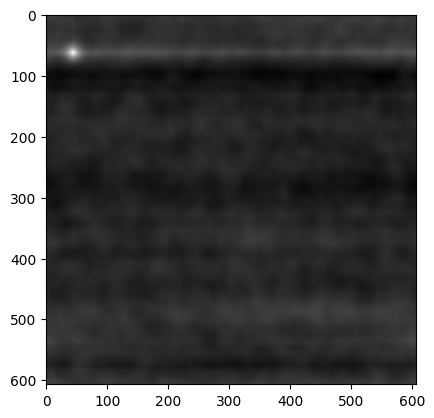

In [114]:
Mur1_conv_Mur2 = np.real( np.fft.ifft2( np.fft.ifftshift( Mur1f * np.conj(Mur2f) ) ) )
plt.imshow(Mur1_conv_Mur2, cmap="gray")

In [115]:
Mur1_conv_Mur2.shape

(607, 607)

In [116]:
# Indexes of the maximal element in a N-dimensional np.array
t_row, t_col = np.unravel_index( np.argmax(Mur1_conv_Mur2), Mur1_conv_Mur2.shape )
print(t_row, " ", t_col)

63   44


True

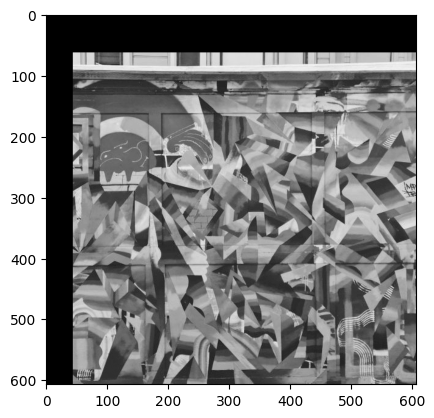

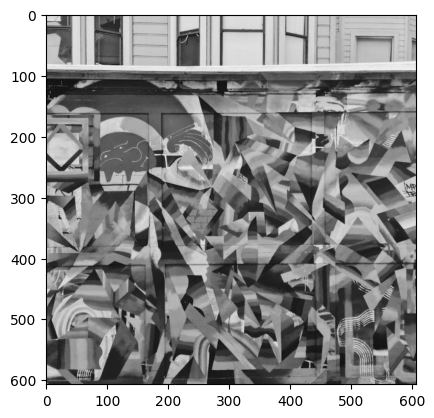

In [117]:
# Make an affine transformation on a specific image
Mur2t = cv.warpAffine( Mur2, np.array([ [1, 0, t_col], [0, 1, t_row] ], dtype=np.float32), dsize=Mur2.shape )
plt.figure()
plt.imshow(Mur2t, cmap="gray")
plt.figure()
plt.imshow(Mur1, cmap="gray")

cv.imwrite("a.jpg", Mur1)
cv.imwrite("b.jpg", Mur2t)

In [118]:
! rm a.jpg b.jpg murales1.png murales2.png